<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E4.1 – Data Visualization**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data/weather.csv"

Mounted at /content/drive


In [4]:
# Load data
df = pd.read_csv(path)

In [5]:
print(df.head())

            Time Weather  Temperature (C)  Apparent Temperature (C)  Humidity  \
0  1/1/2016 0:00   Clear        -6.361111                 -9.361111      0.82   
1  1/1/2016 1:00   Clear        -7.900000                 -7.900000      0.89   
2  1/1/2016 2:00   Clear        -8.522222                -11.827778      0.88   
3  1/1/2016 3:00   Clear        -8.561111                -12.072222      0.88   
4  1/1/2016 4:00  Cloudy        -8.577778                -11.644444      0.92   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0             6.0858                     121          15.8263   
1             3.2200                     140          14.8764   
2             6.0536                     138          15.7297   
3             6.4400                     140          15.7297   
4             5.5867                     137          14.0875   

   Pressure (millibars)                    Daily Summary  
0               1032.01  Cloudy starting in the morning.  
1   

In [6]:
print(df.tail())

                 Time Weather  Temperature (C)  Apparent Temperature (C)  \
4995  8/31/2016 22:00   Clear        16.477778                 16.477778   
4996  8/31/2016 23:00   Clear        15.138889                 15.138889   
4997    9/1/2016 0:00   Clear        16.344444                 16.344444   
4998    9/1/2016 1:00   Clear        15.788889                 15.788889   
4999    9/1/2016 2:00   Clear        13.344444                 13.344444   

      Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
4995      0.64             3.2200                      30          16.1000   
4996      0.67             6.6976                      39          15.5526   
4997      0.60             6.1502                      40          16.1000   
4998      0.62             6.1019                      69          16.1000   
4999      0.73             3.2522                      56          15.1823   

      Pressure (millibars)                                      Daily Summ

Text(0.5, 0.98, 'Weather Data Visualization')

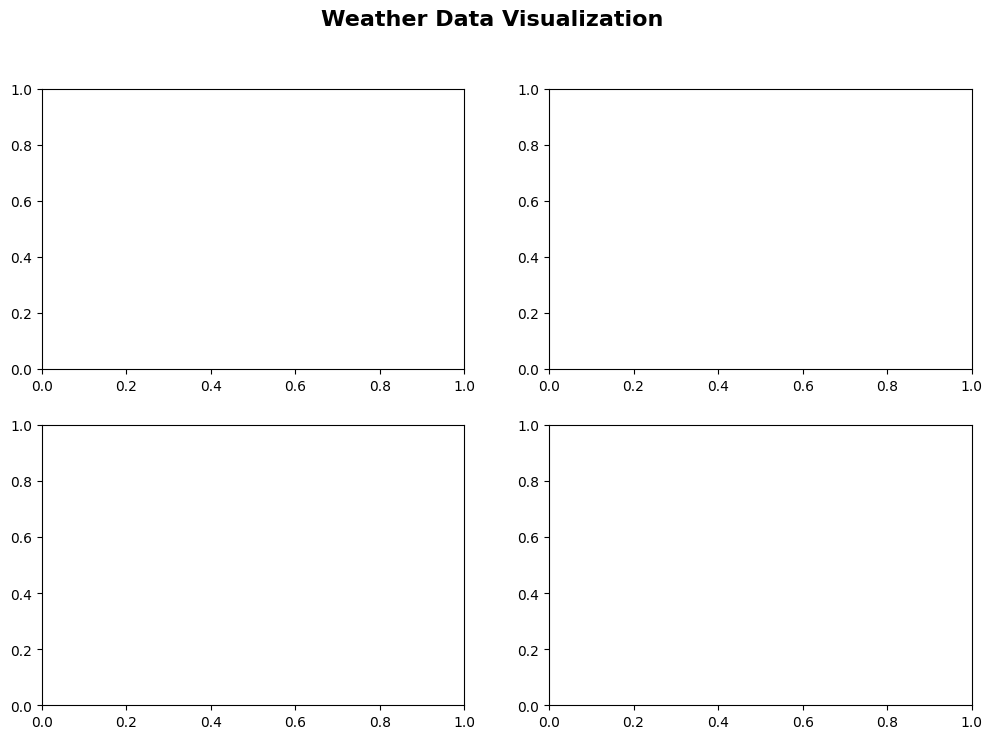

In [7]:
# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Weather Data Visualization", fontsize=16, fontweight='bold')

In [8]:
# --- Top-left: Histogram of "Weather"
axes[0, 0].hist(df["Weather"], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title("Distribution of Weather Conditions")
axes[0, 0].set_xlabel("Weather")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].tick_params(axis='x', rotation=45)

In [13]:
# --- Top-right: Boxplot of "Temperature" and "Apparent Temperature"
axes[0, 1].boxplot(
    [df["Temperature (C)"], df["Apparent Temperature (C)"]],
    labels=["Temperature", "Apparent Temp"],
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='black')
)
axes[0, 1].set_title("Temperature vs Apparent Temperature")
axes[0, 1].set_ylabel("Temperature (°C)")

/tmp/ipython-input-236202602.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(


Text(511.7171717171717, 0.5, 'Temperature (°C)')

In [15]:
# --- Bottom-left: Bar chart of "Wind Speed"
axes[1, 0].bar(
    range(len(df["Wind Speed (km/h)"])),
    df["Wind Speed (km/h)"],
    color=plt.cm.viridis(df["Wind Speed (km/h)"] / max(df["Wind Speed (km/h)"]))
)
axes[1, 0].set_title("Wind Speed")
axes[1, 0].set_xlabel("Sample Index")
axes[1, 0].set_ylabel("Wind Speed (km/h)")

Text(4.444444444444466, 0.5, 'Wind Speed (km/h)')

In [17]:
# --- Bottom-right: Histogram of "Wind Bearing"
axes[1, 1].hist(df["Wind Bearing (degrees)"], bins=20, color='salmon', edgecolor='black')
axes[1, 1].set_title("Wind Bearing Distribution")
axes[1, 1].set_xlabel("Wind Bearing (degrees)")
axes[1, 1].set_ylabel("Frequency")

Text(511.7171717171717, 0.5, 'Frequency')

In [18]:
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 640x480 with 0 Axes>

**E4.2 – Linear Regression Analysis**

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

Text(0.5, 0.98, 'Linear Regression Analysis on Weather Data')

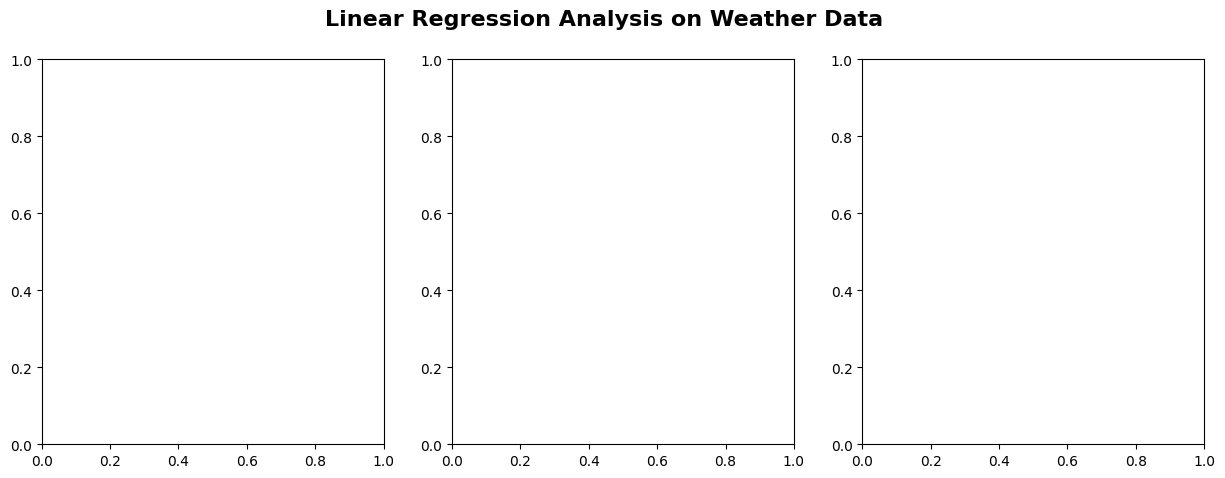

In [20]:
# Prepare figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Linear Regression Analysis on Weather Data", fontsize=16, fontweight='bold')

In [22]:
# --- Left: Temperature vs Apparent Temperature
X1 = df[["Temperature (C)"]]
y1 = df["Apparent Temperature (C)"]
model1 = LinearRegression().fit(X1, y1)
y_pred1 = model1.predict(X1)
axes[0].scatter(X1, y1, color='blue', alpha=0.5, label='Data')
axes[0].plot(X1, y_pred1, color='red', label='Regression Line')
axes[0].set_title("Temperature vs Apparent Temperature")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Apparent Temperature (°C)")
axes[0].legend()

In [28]:
%matplotlib inline

# --- Middle: Apparent Temperature vs Humidity
X2 = df[["Apparent Temperature (C)"]]
y2 = df["Humidity"]
model2 = LinearRegression().fit(X2, y2)
y_pred2 = model2.predict(X2)
axes[1].scatter(X2, y2, color='green', alpha=0.5, label='Data')
axes[1].plot(X2, y_pred2, color='red', label='Regression Line')
axes[1].set_title("Apparent Temperature vs Humidity")
axes[1].set_xlabel("Apparent Temperature (°C)")
axes[1].set_ylabel("Humidity")
axes[1].legend()

In [24]:
# --- Right: Wind Speed vs Visibility
X3 = df[["Wind Speed (km/h)"]]
y3 = df["Visibility (km)"]
model3 = LinearRegression().fit(X3, y3)
y_pred3 = model3.predict(X3)
axes[2].scatter(X3, y3, color='purple', alpha=0.5, label='Data')
axes[2].plot(X3, y_pred3, color='red', label='Regression Line')
axes[2].set_title("Wind Speed vs Visibility")
axes[2].set_xlabel("Wind Speed (km/h)")
axes[2].set_ylabel("Visibility (km)")
axes[2].legend()

In [29]:
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 640x480 with 0 Axes>